# Distribuições de Prioris Conjugadas

Se a distribuição a priori é membro de uma família e a distribuição a posteriori também pertence a mesma a família, essa família de distribuições é chamada de **família conjugada**. A principal consequência de usar prioris de uma família conjugada é que as contas ficam muito mais simples. 

## Teorema 

Suponha que $X_1, ..., X_n \overset{iid}{\sim} \text{Bernoulli}(\theta)$, $0 < \theta < 1$ desconhecido. Suponha que $\theta \sim \text{Beta}(\alpha, \beta)$. Então, a distribuição a posteriori de $\theta$ é a distribuição beta com parâmetros $\alpha + \sum_{i=1}^n x_i$ e $\beta + n - \sum_{i=1}^n x_i$. 

## Teorema 

Suponha que $X_1, ...., X_n \overset{iid}{\sim} \text{Poisson}(\theta)$, onde $\theta$ é desconhecido. Suponha também que a distribuição a priori de $\theta$ é uma gamma com parâmetros $\alpha$ e $\beta$. Então a distribuição a posteriori de $\theta$ sejá gamma com parâmetros $\alpha + \sum_{i=1}^n x_i$ e $\beta + n$. 

## Teorema 

Suponha que $X_1, ...., X_n \overset{iid}{\sim} \text{Normal}(\theta, \sigma^2)$, onde $\theta$ é desconhecido e $\sigma$ é conhecido. Suponha também que a distribuição a priori de $\theta$ é uma normal com média $\mu_0$ e variância $v_0^2$. Então a distribuição a posteriori de $\theta$ sejá normal com média $\mu_1$ e variância $v_1^2$, onde: 
$$\mu_1 = \frac{\sigma^2\mu_0 + nv_0^2\bar{x}_n}{\sigma^2 + nv_0^2}$$
$$v_1^2 = \frac{\sigma^2v_0^2}{\sigma^2 + nv_0^2}$$
## Teorema 

Suponha que $X_1, ...., X_n \overset{iid}{\sim} \text{Exp}(\theta)$, onde $\theta$ é desconhecido. Suponha também que a distribuição a priori de $\theta$ é uma gamma com parâmetros $\alpha$ e $\beta$. Então a distribuição a posteriori de $\theta$ sejá gamma com parâmetros $\alpha + n$ e $\beta + \sum_{i=1}^n x_i$. 

In [22]:
import numpy as np 
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import animation, cm
from IPython.display import HTML

%matplotlib inline

Suponha que $\theta$ seja a probabilidade de um item ser defeituoso em uma série de items. Suponha que nossa priori em $\theta$ é uma distribuição beta com parâmetros $\alpha$ e $\beta$. São selecionados $n$ items por vez para o teste. Sabemos que nossa posteriori será uma $\beta$ com os parâmetros acima. Vejamos graficamente esse processo. 

In [2]:
theta_real = 0.1
n = 100
np.random.seed(10)

XMIN = 0 
XMAX = 1
YMIN = 0
YMAX = 5

alpha = [1] 
beta = [1] 

x = np.linspace(0.001,1,1000)

# Definindo cores
cmap = cm.autumn  

# Esta função permite plotar o backgroud
def init():
    line.set_data([], [])
    return (line,)

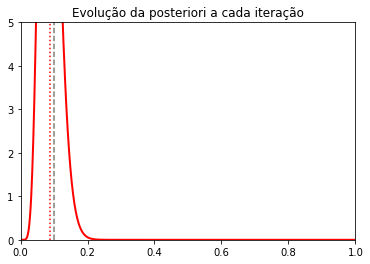

In [3]:
# Definindo o espaço da imagem

fig, ax = plt.subplots()

# Definindo características do background 
ax.set_xlim((XMIN, XMAX))
ax.set_ylim((YMIN, YMAX))
ax.set_title('Evolução da posteriori a cada iteração')
ax.vlines(theta_real, ymin = YMIN, ymax = YMAX, linestyle = '--', color = 'grey')

# Definindo plots variáveis 
line, = ax.plot([], [], lw=2)
line2, _ = ax.plot(XMIN, XMAX, YMIN, YMAX, linestyle = ':')

def animate(i, alpha, beta, x, n):

    # Amostro da distribuição
    sample = np.random.binomial(1, p = theta_real)
    
    # Junto a lista que guarda os alphas e betas de cada iteração
    alpha.append(alpha[-1] + sample)
    beta.append(beta[-1] + 1 - sample)
    
    # Calculo a posteriori
    posteriori = stats.beta(a = alpha[-1], b = beta[-1])
    
    line.set_data(x, posteriori.pdf(x))
    line.set_color(cmap(1 - i/n))
    
    line2.set_data([posteriori.mean(), posteriori.mean()],  [YMIN, YMAX])
    line2.set_color(cmap(1 - i/n))
    
    return (line,line2)

anim = animation.FuncAnimation(fig, animate, frames = n,  init_func = init,
                               interval = 100, blit = True, fargs=(alpha, beta, x, n), repeat = False)
HTML(anim.to_html5_video())

## Hiperparâmetros 

Seja $\Psi$ uma família de distribuições possíveis sobre um espaço de parêmtros $\Omega$. Suponha que independente da distribuição a priori dessa família e não importando as observações (quais são ou quantas são), a distribuição a posteriori seja da mesma família. Chamamos $\Psi$ de família conjunda de distribuições a priori. Os parâmetros associados a essa família são chamados de hiperparâmetros. 


## [Distribuições a Priori Impróprias](https://algassert.com/post/1630)

Seja $\xi$ uma função não negativa tal que $\Omega$ é subconjunto de seu domínio. Suponha que $\int \xi(\theta) d\theta = \infty$. Se $\xi(\theta)$ é priori de $\theta$, ela é chamada de prioori imprópria. Podemos gerar limites de distribuições, como, por exemplo, a distribuição uniforme $[0,1]$ com intervalo sendo a reta, agora.

# Estimador de Bayes

## Estimador

Seja $X_1, ..., X_n$ dados observador cuja distribuição conjunta é inndexada pelo parâmetro $\theta$. Um estimador do parâmetro $\theta$ é uma função real $X_1, ..., X_n \mapsto \delta(X_1, ..., X_n)$. Se $X_i = x_i$ é observado, $\delta(x_1,...,x_n)$ é uma estimativa. 

## Função de Perda 

É uma função real $L(\theta, a)$ onde $\theta \in \Omega$ e $a \in \mathbb{R}$. Essa função procura indicar, para cada escoolha de $\theta$, a perda do estatístico. Seja $\xi(\theta)$ priori de $\theta$. O valor esperado da perda é dado por:

$$E[L(\theta, a)] = \int_{\Omega} L(\theta, a)\xi(\theta) d\theta, \text{ a priori}$$
$$E[L(\theta, a)|x] = \int_{\Omega} L(\theta, a)\xi(\theta|x) d\theta, \text{ a posteriori}$$

## Estimador de Bayes 

Seja $L(\theta, a)$ função de perda. Seja $\delta^*(x)$ o valor de $a$ tal que $E[L(\theta, a)|x]$ é minimizado. Então $\delta^*$ é o **estimador de Bayes** de $\theta$. 

$$E[L(\theta, \delta^*(x))|x] = \min_{a \in \mathbb{R}}E[L(\theta, a)|x]$$


### Funções de Perda: Exemplos 

- Erro quadrático: $L(\theta, a) = (\theta - a)^2$
    - Queremos minimizar $E[(\theta - a)^2|x]$
    
    - $\delta^*(X) = E(\theta| X)$
    
    - Página 260 (DeGroot)

- Erro absoluto: $L(\theta, a) = |\theta - a|$
    - Queremos minimizar $E[|\theta - a||x]$
    
    - $\delta^*(X) = \text{mediana (quartil 0.5)}$
    
    - Página 245 (DeGroot)
    

## Estimador Consistente 

Uma sequência de estimadores que converge em probabilidade para um valor desconhecido de um parâmetro a ser estimafo é chamado de sequência consistente de estimadores. Essa consistência fala que em grandes amostras, o estimador estará próximo o suficiente do valor desconhecido de $\theta$. 

O estimador de Bayes, sob algumas condições, forma uma sequência de estimadores consistentes. 


## Limitações 

De acordo com a teoria Bayesiana , esse estimador é o único coerente que pode ser construído. É importante que tenha-se definido uma **função de perda** e uma **distribuição a priori** para os parâmetros. Quando $\theta$ é um vetor, precisamos definit uma priori multivariada, mesmo que não queiramos estimar todos os parâmetros. 

#### Exemplo 7.4.7 

Quetelet reportou medidas do peito de 5732 homens militares. Os dados foram retirados desse [site](https://www.stat.cmu.edu/StatDat/Datafiles/MilitiamenChests.html). 

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### Obtendo os dados direto do site

Eu uso essas três bibliotecas, onde as duas primeiras são usadas para retirar informação do site desejado. Veja que não coloco verificação, pois o site tem esse problema. Depois eu coloco numa estrutura chamada `DataFrame` que é basicamente uma tabela onde tem cada item nas linhas e cada característica nas colunas. 

In [20]:
website = requests.get('https://www.stat.cmu.edu/StatDat/Datafiles/MilitiamenChests.html', verify = False)
soup = BeautifulSoup(website.content)

data = soup.pre.text.strip().split('\n')
chest_data = {'Chest': [], 'Count': []}
for item in data[1:]: 
    co, ch = item.split('\t')
    chest_data['Chest'].append(int(ch))
    chest_data['Count'].append(int(co))
    
chest_df = pd.DataFrame(chest_data)
chest_df.head()

/home/lucasmoschen/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


,Chest,Count
0,33,3
1,34,18
2,35,81
3,36,185
4,37,420


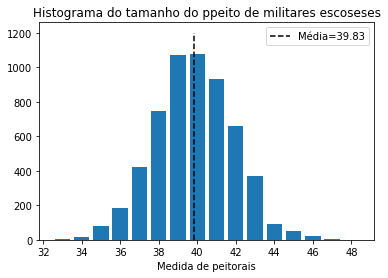

In [39]:
plt.bar(chest_df['Chest'], chest_df['Count'])
mean = sum(chest_df['Chest']*chest_df['Count'])/chest_df['Count'].sum()
plt.vlines(mean, ymin = 0, ymax = 1200, color = 'black', linestyle = '--', label = 'Média={:.2f}'.format(mean))
plt.title('Histograma do tamanho do ppeito de militares escoseses')
plt.xlabel('Medida de peitorais')
plt.legend()
plt.show()

Vamos modelar as medidas do peitoral, como uma amostra aleatória com distribuição normal com média $\theta$ e variância $\sigma^2$, conhecido. Temos que a média é $39.83$ das amostras. Se $\theta \sim N(\mu_0, v_0^2)$ é uma priori para $\theta$, podemos calcular o estimador de Bayes a posteriori. Sabemos que a posteriori será uma normal (conjugada) com média e variância: 
$$\mu_1 = \frac{\sigma^2 + 5732\cdot v_0^2 \cdot 39.83}{\sigma^2 + 5732\cdot v_0^2}$$
$$v_1^2 = \frac{\sigma^2 v_0^2}{\sigma^2 + 5732\cdot v_0^2}$$

O estimador de Bayes é a média a posteriori, portanto $\delta(x) = \mu_1$ 